<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Simulation/blob/main/PDE_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Mohammad Hadi Pahlevani

# Partial Differential Equation Training

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 1 Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model for PDEs. Here it is:
$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0$.
c is a velocity, whereas u can be any advected quantity. For example it can be the concentration of some polutant in a river flowing at speed c.


With given initial conditions (understood as a wave), the equation represents the propagation of that initial wave with speed c along the X axis
, without change of shape. Let the initial condition be $u(x,0)=u0(x)$
. Then the exact solution of the equation is $u(x,t)=u0(x−ct)$
(See lecture this morning).


We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate x  into points that we index from $i=0$ to $N$ , and stepping in discrete time intervals of size $dt$.




We use the following convention : $U^{n}_i$ is the amplitude of the wave at time $t=n \times dt$, and at $x=i \times dx$

How woud you approximate $\frac{\partial u}{\partial t}$ , using $U^{n}_i$, with a forward difference sheme ?

$$ \frac{ \partial u}{ \partial t }= \frac {{U_j}^{n+1} - {U_j}^{n}} {dt} $$

How woud you approximate $\frac{\partial u}{\partial x}$ , using $U^{n}_i$, with a backward difference sheme ?


$$ \frac{ \partial u}{ \partial t }= \frac {{U_j}^{n} - {U_j}^{n-1}} {dt} $$

Write the first order explicit integration scheme we will use, in function of $U^{n}_i$, c, dt, dx, $U^{n}_i$ and $U^{n}_{i-1}$

$$ U^{n+1}_i= U^{n}_i - \frac{cdt}{dx} (U^{n}_i - U^{n}_{i-1}) $$

Now let's try implementing this in Python.

We want to define an evenly spaced grid of points within a  domain that is 2 units of length wide, i.e., 0<x_i<2. Vafiable $nx$ which will be the number of grid points we want and dx will be the distance between two adjacent grid points. we define the following values

In [ ]:
nx = 41  # This will be changed latter
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step
c = 1      #assume advection velocity  is c = 1

We also need to set up our initial conditions. The initial concentration $u_0$
 is given as  u=2 in the interval 0.5≤x≤1 and u=1
 everywhere else in (0,2)  (i.e., a hat function). Build U

In [ ]:
x = list(np.linspace(0,2,nx))
U = list(np.ones(nx))
for i in range(nx):
  if 0.5<x[i]<1:
    U[i]=2
  else:
    U[i]=1
U0 = U
#U0 = np.transpose(U)

In [ ]:
plot, U, your initial concentration profile.


SyntaxError: invalid syntax (<ipython-input-4-58a8beb1d7c1>, line 1)

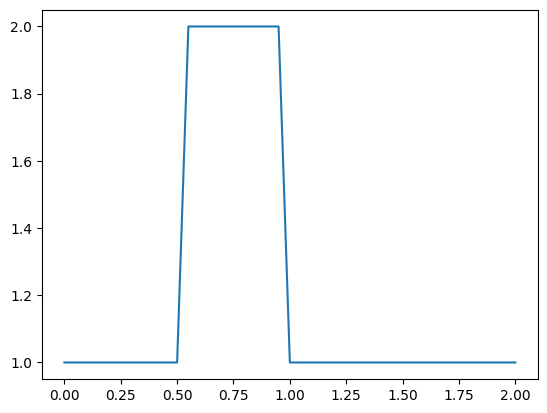

In [ ]:
plt.plot(x,U)

Why doesn't the hat function have perfectly straight sides? Think for a bit.

*Because we're doing a numerical simulation.*

Now we miplement the discretization of the convection equation using a finite-difference scheme. For every element i of our array $U^{n}_i$ we need to perform the operation define above ($U^{n+1}_i$).  We'll store the result in a new (temporary) array Un, which will be the next state of U  for the next time-step. We will repeat this operation for as many time-steps as we specify and then we can see how far the concentration profile has convected.

We will need also boundary conditions, so for the moment we will only use periodic boundary conditions (what leaves from the right, re-enters at the left)

 The code's structure is the following :

 1) define U at time =0, dt, dx, c etc...

 2) compute Un as a function of U and all other information.

 3) Take care of boundary conditions at the edges  (use periodic boundary conditions on X)

 4) Time=Time+dt

 5) go back to 2


Boundary conditions: Explain how you compute the first and last point of the grid (i=0 and i=N)

Write the code...

41
41


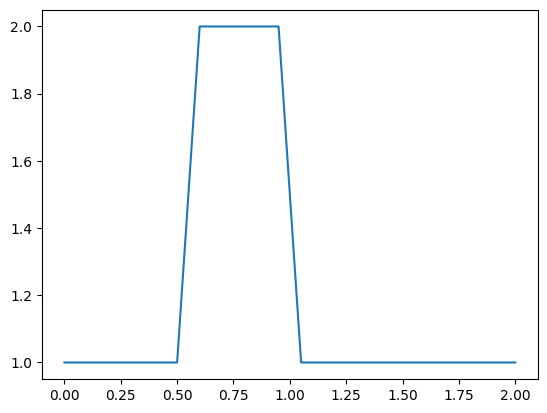

In [ ]:
nx = 41  # This will be changed latter
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step
c = 1      #assume advection velocity  is c = 1
sigma = c * dt/dx
U = U0

# defining A which U_n+1 = A * U_n
A = np.zeros((nx, nx))
for i in range(nx):
  A[i,i] = 1 - sigma
  A[i,i-1] = sigma

print(len(U))
U = np.matmul(A, U)
print(len(U))
plt.plot(x,U)

PLot U at different times: 3 time steps, 12 time steps, 25 time steps

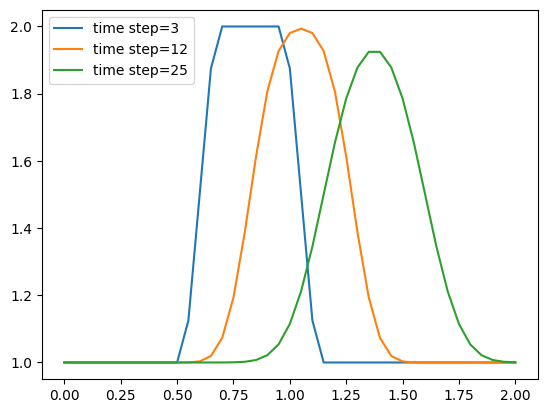

In [ ]:
U = U0
for j in range(nt):
  U = np.matmul(A, U)
  if j==2 or j== 11 or j==24 :
    plt.plot(x,U, label='time step='+str(j+1))
plt.legend()


What do you notice ? comment on what you see.

*The result shows that after each iteraion, the plot moves in the direction of velocity (c) which we expect but. as time passes, we observe dissipation which means the accuracy of the simulation is decreasing over time.*

What is the value of CFL=dt C / dx ?

In [ ]:
CFL = dt * c / dx
print('CFL = '+ str(CFL))

CFL = 0.5


Redo the same computation, vayring dt , for CFL>1. and CFL << 1

Text(0.5, 1.0, 'UPWIND Approximation for TopHat function \n CFL=1.0499999999999998')

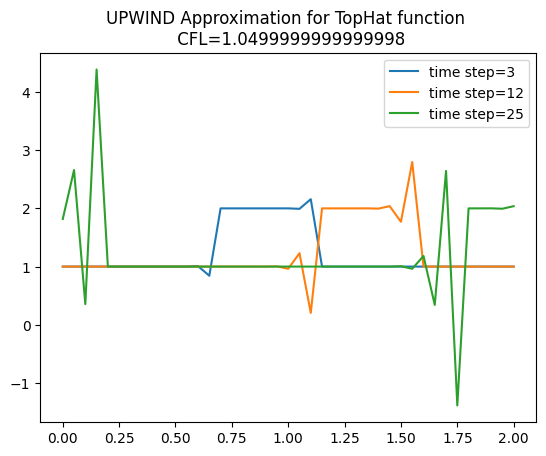

In [ ]:
# dt large
nx = 41  # This will be changed latter
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt1 = (2.1) * Delta_T/(nt*1.0) #dt is lentgh  of each time step
c = 1      #assume advection velocity  is c = 1
sigma1 = c * dt1/dx
U = U0

# defining A which U_n+1 = A * U_n
A = np.zeros((nx, nx))
for i in range(nx):
  A[i,i] = 1 - sigma1
  A[i,i-1] = sigma1

U = U0
for j in range(nt):
  U = np.matmul(A, U)
  if j==2 or j== 11 or j==24 :
    plt.plot(x,U, label='time step='+str(j+1))
plt.legend()
plt.title("UPWIND Approximation for TopHat function \n CFL="+str(dt1 * c / dx))



Text(0.5, 1.0, 'CFL<<1')

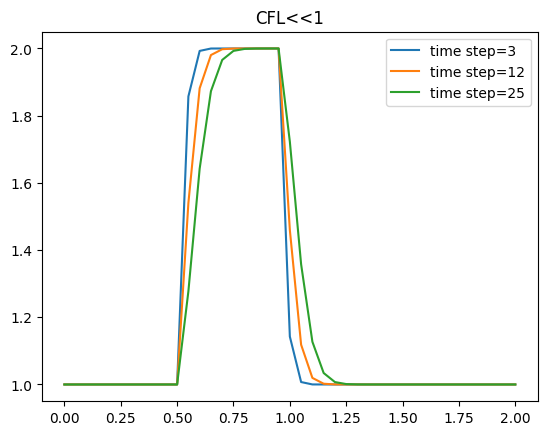

In [ ]:

# dt small

nx = 41  # This will be changed latter
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt2 = (1/10) * Delta_T/(nt*1.0) #dt is lentgh  of each time step
c = 1      #assume advection velocity  is c = 1
sigma2 = c * dt2/dx
U = U0

# defining A which U_n+1 = A * U_n
A = np.zeros((nx, nx))
for i in range(nx):
  A[i,i] = 1 - sigma2
  A[i,i-1] = sigma2

U = U0
for j in range(nt):
  U = np.matmul(A, U)
  if j==2 or j== 11 or j==24 :
    plt.plot(x,U, label='time step='+str(j+1))
plt.legend()
plt.title("CFL<<1")

What do you notice ? What is the the good integration conditions ?

**Increasing $dt$ leads in changes to both $σ$ and $CFL$: \\
1- CFL>1: The simulation loses stability and doesn't represent any physical phenomena. \\
2- CFL$<<$1: The simulation happens with a lower rate of change of poisition with respect to timesteps but it well maintains stability and the form of the plot shows less unwanted change and dissipation.**

Now redo the computation, with CFL>1 and using an initial U that is gaussian.

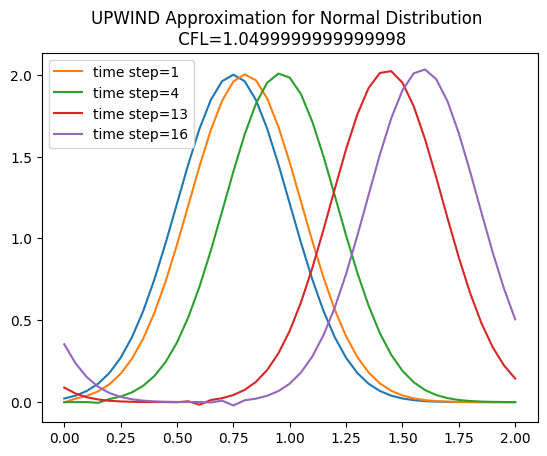

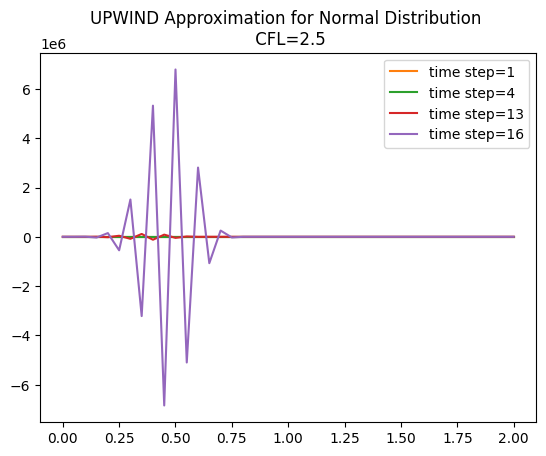

In [ ]:
# sigma close to 1
nx = 41  # This will be changed latter
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt3 = (2.1) * Delta_T/(nt*1.0) #dt is lentgh  of each time step
c = 1      #assume advection velocity  is c = 1
sigma3 = c * dt3/dx

# Parameters for the Gaussian function
A = 2        # Maximum value of U
mu = 0.75       # Mean (center of the peak)

x = list(np.linspace(0,2,nx))
U = list(np.ones(nx))
for i in range(nx):
  U[i] = A * np.exp(-((x[i] - mu) ** 2) / (2 * 0.25 ** 2))
plt.plot(x,U)
plt.title("Gaussian initial condition")

# defining A which U_n+1 = A * U_n
A = np.zeros((nx, nx))
for i in range(nx):
  A[i,i] = 1 - sigma3
  A[i,i-1] = sigma3

U = U
for j in range(nt):
  U = np.matmul(A, U)
  if j==0 or j==3 or j==12 or j==15:
    plt.plot(x,U, label='time step='+str(j+1))
plt.legend()
plt.title("UPWIND Approximation for Normal Distribution \n CFL="+str(dt3 * c / dx))
plt.show()


# sigma a lot larger than 1
nx = 41  # This will be changed latter
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt3 = (5) * Delta_T/(nt*1.0) #dt is lentgh  of each time step
c = 1      #assume advection velocity  is c = 1
sigma3 = c * dt3/dx

# Parameters for the Gaussian function
A = 2        # Maximum value of U
mu = 0.75       # Mean (center of the peak)

x = list(np.linspace(0,2,nx))
U = list(np.ones(nx))
for i in range(nx):
  U[i] = A * np.exp(-((x[i] - mu) ** 2) / (2 * 0.25 ** 2))
plt.plot(x,U)
plt.title("Gaussian initial condition")

# defining A which U_n+1 = A * U_n
A = np.zeros((nx, nx))
for i in range(nx):
  A[i,i] = 1 - sigma3
  A[i,i-1] = sigma3

U = U
for j in range(nt):
  U = np.matmul(A, U)
  if j==0 or j==3 or j==12 or j==15:
    plt.plot(x,U, label='time step='+str(j+1))
plt.legend()
plt.title("UPWIND Approximation for Normal Distribution \n CFL="+str(dt3 * c / dx))
plt.show()

What do you notice ?

*It can be noticed that with in the gaussian case, if σ is close to 1, the simulation is to some extent accurate but as σ gets larger due to an icrease to $dt$, then the simulation breaks just like for the Top-hat case.*

 Redo the same thing using a 2nd order accuracy expression for the space derivative, and 1st order accuracy expression for the time derivative
    like leap frog.

What is the new integration scheme ?


${U}^{n+1}_i= {U}^{n}_i + σ \frac{{U}^{n}_{i+1}-{U}^{n+1}_{i-1}}{2}$

Write your new code and do a try with CFL=0.5

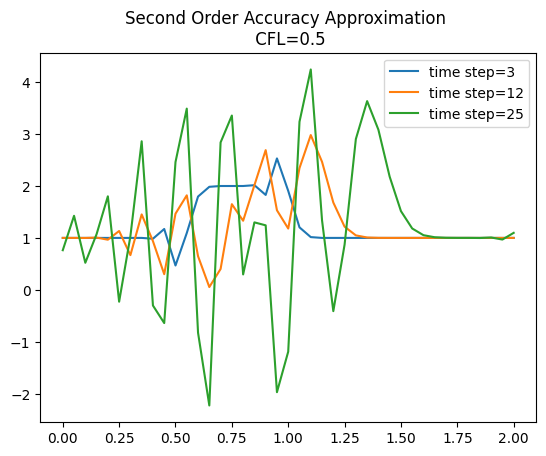

In [ ]:
# Define parameters
nx = 41  # Number of spatial points
dx = 2 / (nx - 1)
nt = 25  # Number of time steps
Delta_T = 0.625  # Total time of integration
dt4 = (1) * Delta_T / nt  # Time step size
c = 1  # Advection velocity
sigma4 = c * dt4 / dx
U = U0  # Initial condition (assumed to be defined)

# defining A which U_n+1 = A * U_n
A = np.zeros((nx, nx))
for i in range(nx):
    A[i, i] = 1
    A[i, (i - 1) % nx] += sigma4 / 2
    A[i, (i + 1) % nx] -= sigma4 / 2


# Time integration using FTCS scheme
for j in range(nt):
    U = np.matmul(A, U)
    if j in [2, 11, 24]:
        plt.plot(x, U, label='time step=' + str(j + 1))
plt.legend()
plt.title("Second Order Accuracy Approximation \n CFL=" + str(dt4 * c / dx))
plt.show()

Comment ?

One might expect the second order accuracy to provide a better approximationn but it does not.